## [dacon basic] Iris 꽃받침 / 꽃잎 너비 예측 경진대회
데이콘 베이직 Basic | 정형 | MAE

https://dacon.io/competitions/official/235836/overview/description

### 1. Import Packages

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import warnings
warnings.filterwarnings(action='ignore')

### 2. Data Loading

In [7]:
train = pd.read_csv("data/iris_train.csv", index_col='id')

print(train.shape)
train.head(2)

(75, 5)


,species,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm)
id,,,,,
0,setosa,4.4,1.4,2.9,0.2
1,versicolor,6.4,4.5,3.2,1.5


In [8]:
test = pd.read_csv("data/iris_test.csv", index_col='id')

print(test.shape)
test.head(2)

(75, 3)


,species,sepal length (cm),petal length (cm)
id,,,
0,setosa,5.4,1.7
1,setosa,5.7,1.5


In [9]:
submission = pd.read_csv("data/sample_submission.csv", index_col='id')

print(submission.shape)
submission.head(2)

(75, 2)


,sepal width (cm),petal width (cm)
id,,
0,0,0
1,0,0


### 3. Preprocessing

In [9]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 0 to 74
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            75 non-null     object 
 1   sepal length (cm)  75 non-null     float64
 2   petal length (cm)  75 non-null     float64
 3   sepal width (cm)   75 non-null     float64
 4   petal width (cm)   75 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.5+ KB


,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm)
count,75.000000,75.000000,75.000000,75.000000
mean,6.044000,4.258667,2.958667,1.384000
std,0.842653,1.615390,0.388376,0.697106
min,4.300000,1.100000,2.000000,0.100000
25%,5.550000,3.750000,2.800000,1.000000
50%,6.100000,4.700000,3.000000,1.500000
75%,6.600000,5.300000,3.200000,1.850000
max,7.700000,6.900000,4.000000,2.500000


In [10]:
test.info()
test.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 0 to 74
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            75 non-null     object 
 1   sepal length (cm)  75 non-null     float64
 2   petal length (cm)  75 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.3+ KB


,sepal length (cm),petal length (cm)
count,75.000000,75.000000
mean,5.642667,3.257333
std,0.767441,1.776816
min,4.400000,1.000000
25%,5.100000,1.500000
50%,5.500000,3.700000
75%,6.150000,5.050000
max,7.900000,6.400000


##### Case 1 : Label encoding

In [11]:
cnt = 0
for i, u in enumerate(train['species'].unique()):
    cnt = cnt + 1
    print(i, cnt, u)
    

0 1 setosa
1 2 versicolor
2 3 virginica


In [12]:
train['species'].unique() #['setosa', 'versicolor', 'virginica']

for i, u in enumerate(train['species'].unique()):
    train.loc[train['species'] == u, 'species(label)'] = i+1
    
train.head(2)    

,species,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm),species(label)
id,,,,,,
0,setosa,4.4,1.4,2.9,0.2,1.0
1,versicolor,6.4,4.5,3.2,1.5,2.0


In [13]:
test.loc[test["species"] == "setosa", 'species(label)'] = 1
test.loc[test["species"] == "versicolor", 'species(label)'] = 2
test.loc[test["species"] == "virginica", 'species(label)'] = 3

test.head(2)

,species,sepal length (cm),petal length (cm),species(label)
id,,,,
0,setosa,5.4,1.7,1.0
1,setosa,5.7,1.5,1.0


##### Case 2 : One-hot encoding

In [14]:
pd.get_dummies(train['species'])

train = pd.concat([train, pd.get_dummies(train['species'])], axis=1)
train.head(3)

,species,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm),species(label),setosa,versicolor,virginica
id,,,,,,,,,
0,setosa,4.4,1.4,2.9,0.2,1.0,1,0,0
1,versicolor,6.4,4.5,3.2,1.5,2.0,0,1,0
2,virginica,6.2,4.8,2.8,1.8,3.0,0,0,1


In [15]:
pd.get_dummies(test['species'])
test = pd.concat([test, pd.get_dummies(test['species'])], axis=1)
test.head(3)

,species,sepal length (cm),petal length (cm),species(label),setosa,versicolor,virginica
id,,,,,,,
0,setosa,5.4,1.7,1.0,1,0,0
1,setosa,5.7,1.5,1.0,1,0,0
2,setosa,5.3,1.5,1.0,1,0,0


##### Case 3 : Standard Scaler

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sscaler = StandardScaler()

In [98]:
train.head(1)
s_col = "sepal length (cm)	petal length (cm)	sepal width (cm)	petal width (cm)".split("\t")

sscaler.fit(train[s_col])
sscaled = sscaler.transform(train[s_col])

In [27]:
a_col = ['ss_sepal length (cm)', 'ss_petal length (cm)', 'ss_sepal width (cm)', 'ss_petal width (cm)']

train[a_col] = sscaled
train.head(1)

,species,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm),species(label),setosa,versicolor,virginica,ss_sepal length (cm),ss_petal length (cm),ss_sepal width (cm),ss_petal width (cm)
id,,,,,,,,,,,,,
0,setosa,4.4,1.4,2.9,0.2,1.0,1,0,0,-1.964118,-1.781562,-0.152074,-1.709888


In [63]:
ts_col = "sepal length (cm)	petal length (cm)".split("\t")

sscaler.fit(test[ts_col])
sscaled = sscaler.transform(test[ts_col])

ta_col = ['ss_sepal length (cm)', 'ss_petal length (cm)']

test[ta_col] = sscaled
test.head(1)

,species,sepal length (cm),petal length (cm),species(label),setosa,versicolor,virginica,ss_sepal length (cm),ss_petal length (cm)
id,,,,,,,,,
0,setosa,5.4,1.7,1.0,1,0,0,-0.318332,-0.882377


In [ ]:
train[a_col].describe()

In [ ]:
## Inverse Scale exmaples :
sscaler.inverse_transform(train[a_col])

##### Extra-Case  : Min-Max Scaler

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
mscaler = MinMaxScaler()

In [35]:
mscaler.fit(train[s_col])
mscaled = mscaler.transform(train[s_col])

In [37]:
b_col = ['mm_sepal length (cm)', 'mm_petal length (cm)', 'mm_sepal width (cm)', 'mm_petal width (cm)']

train[b_col] = mscaled
train.head(1)

,species,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm),species(label),setosa,versicolor,virginica,ss_sepal length (cm),ss_petal length (cm),ss_sepal width (cm),ss_petal width (cm),mm_sepal length (cm),mm_petal length (cm),mm_sepal width (cm),mm_petal width (cm)
id,,,,,,,,,,,,,,,,,
0,setosa,4.4,1.4,2.9,0.2,1.0,1,0,0,-1.964118,-1.781562,-0.152074,-1.709888,0.029412,0.051724,0.45,0.041667


### 4. Analysis

#### 4-1) All kinds of species

In [54]:
train.corr()#[["sepal width (cm)","petal width (cm)"]]

,sepal width (cm),petal width (cm)
sepal length (cm),0.027104,0.763597
petal length (cm),-0.274590,0.953549
sepal width (cm),1.000000,-0.217103
petal width (cm),-0.217103,1.000000
species(label),-0.303901,0.937646
setosa,0.502880,-0.854944
versicolor,-0.356982,-0.036161
virginica,-0.053618,0.734220
ss_sepal length (cm),0.027104,0.763597
ss_petal length (cm),-0.274590,0.953549


#### 4-2-1) species each : setosa

In [ ]:
train.head(1)
train[train['setosa'] == 1].corr()

#### 4-2-2) species each : versicolor

In [ ]:
train[train['versicolor'] == 2].corr()

#### 4-2-3) species each : virginica

In [15]:
train[train['species(label)'] == 3].corr()

,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm),species(label),setosa,versicolor,virginica
sepal length (cm),1.000000,0.909107,0.473749,0.247149,NaN,NaN,NaN,NaN
petal length (cm),0.909107,1.000000,0.418791,0.386929,NaN,NaN,NaN,NaN
sepal width (cm),0.473749,0.418791,1.000000,0.549109,NaN,NaN,NaN,NaN
petal width (cm),0.247149,0.386929,0.549109,1.000000,NaN,NaN,NaN,NaN
species(label),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
setosa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
versicolor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
virginica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
train.columns[5:]

Index(['species(label)', 'setosa', 'versicolor', 'virginica',
       'ss_sepal length (cm)', 'ss_petal length (cm)', 'ss_sepal width (cm)',
       'ss_petal width (cm)', 'mm_sepal length (cm)', 'mm_petal length (cm)',
       'mm_sepal width (cm)', 'mm_petal width (cm)'],
      dtype='object')

In [57]:
list(enumerate(train['species'].value_counts()))

[(0, 30), (1, 30), (2, 15)]

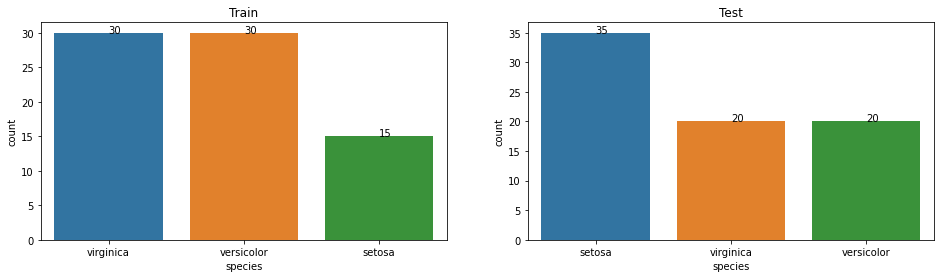

In [16]:
figure, ax = plt.subplots(1,2)
figure.set_size_inches(16,4)

sns.countplot(data=train, x='species', order=train['species'].value_counts().index, ax=ax[0]).set_title('Train')
for i, s in enumerate(train['species'].value_counts()):
#     print(train['species'].value_counts().index[i])
    ax[0].text(i, s, s)

    
sns.countplot(data=test, x='species', order=test['species'].value_counts().index, ax=ax[1]).set_title('Test')
for i, s in enumerate(test['species'].value_counts()):
#     print(train['species'].value_counts().index[i])
    ax[1].text(i, s, s)


In [67]:
# figure, ax = plt.subplots(nrows=1, ncols=2)

# sns.pairplot(data=train[train.columns[0:4]])
# sns.pairplot(data=train[train.columns[5:]])

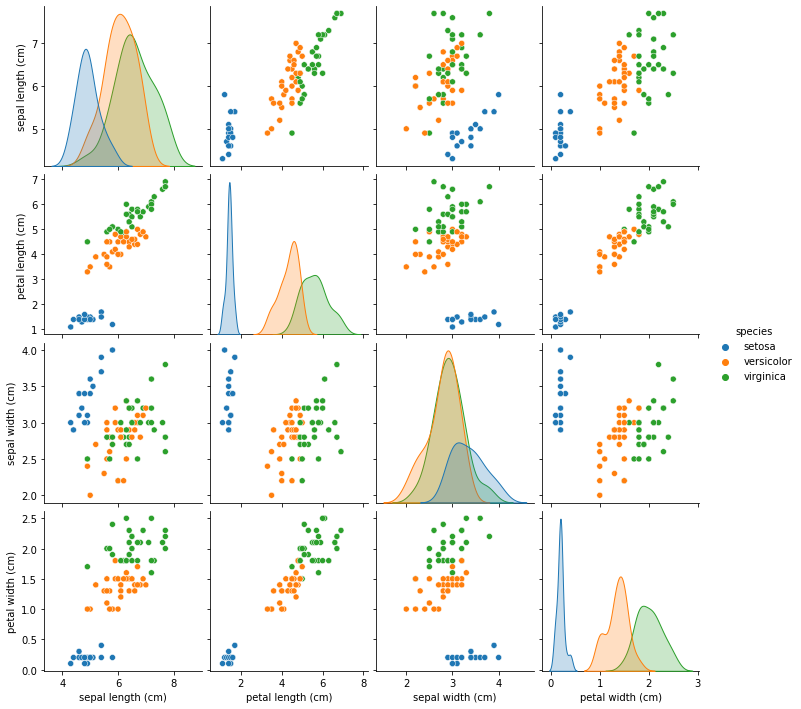

In [140]:
sns.pairplot(data=train[train.columns[0:5]], hue='species')

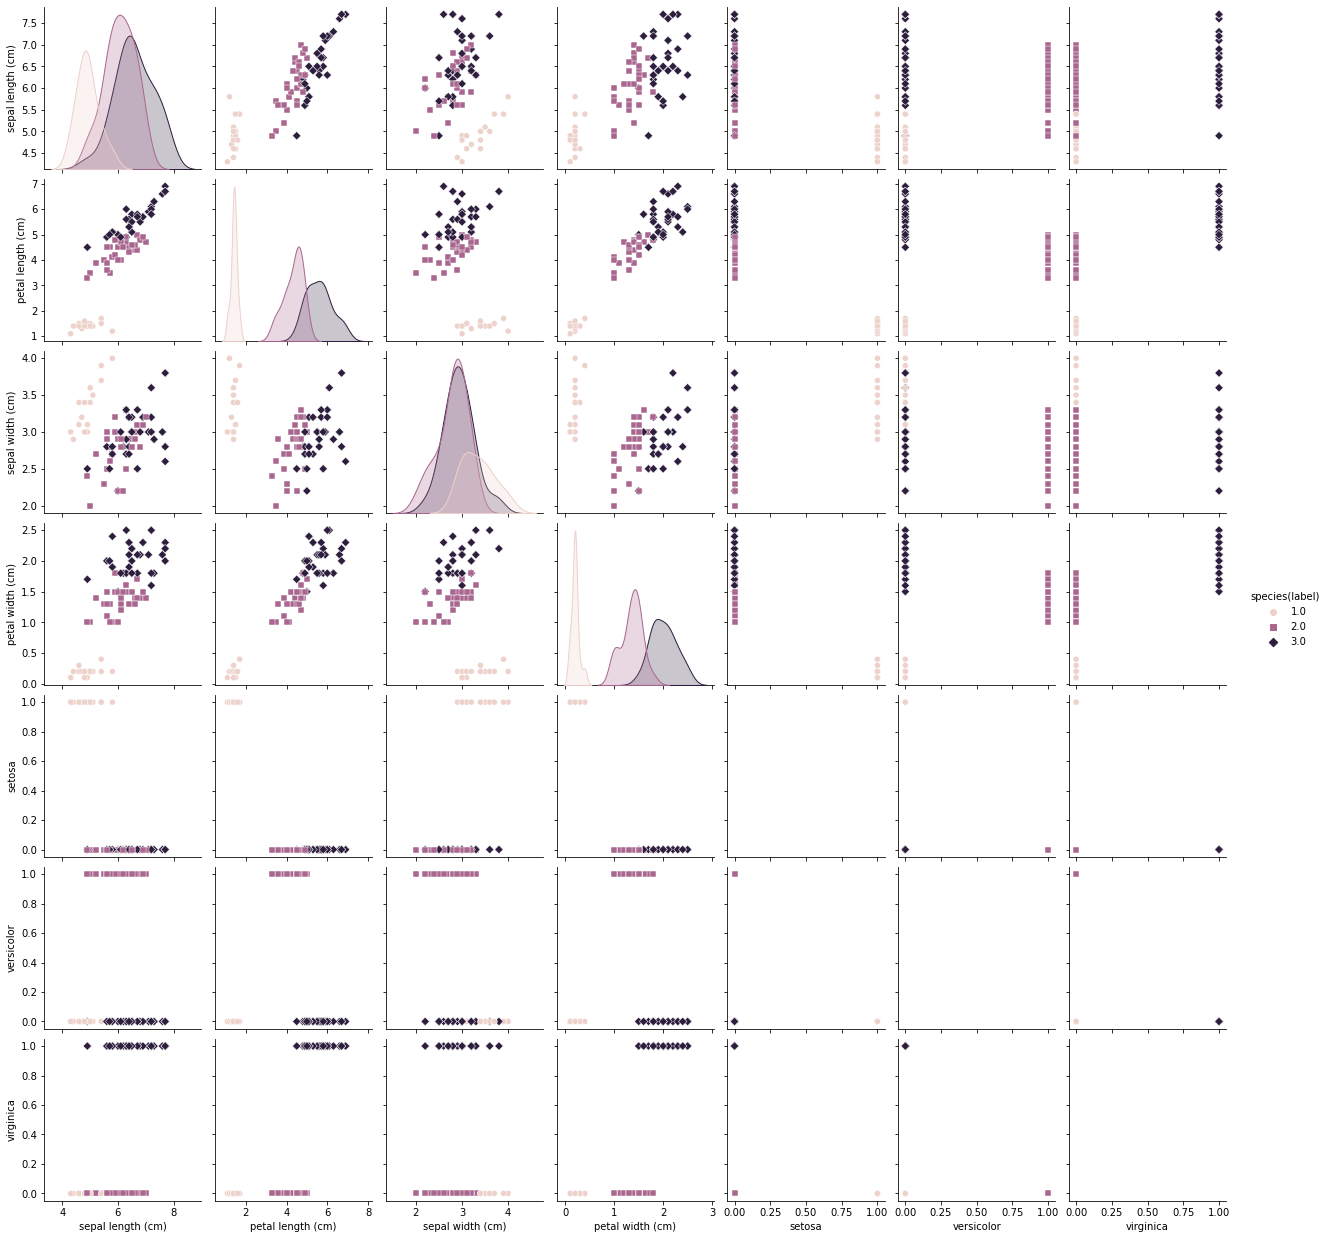

In [73]:
sns.pairplot(data=train, hue='species(label)', markers=["o","s","D"])

>- sepal width (cm)	: sepal length (cm) + species
>- petal width (cm) : petal length (cm) + species

In [64]:
train.columns

Index(['species', 'sepal length (cm)', 'petal length (cm)', 'sepal width (cm)',
       'petal width (cm)', 'species(label)', 'setosa', 'versicolor',
       'virginica', 'ss_sepal length (cm)', 'ss_petal length (cm)',
       'ss_sepal width (cm)', 'ss_petal width (cm)', 'mm_sepal length (cm)',
       'mm_petal length (cm)', 'mm_sepal width (cm)', 'mm_petal width (cm)'],
      dtype='object')

In [58]:
train.head(1)

,species,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm),species(label),setosa,versicolor,virginica,ss_sepal length (cm),ss_petal length (cm),ss_sepal width (cm),ss_petal width (cm),mm_sepal length (cm),mm_petal length (cm),mm_sepal width (cm),mm_petal width (cm)
id,,,,,,,,,,,,,,,,,
0,setosa,4.4,1.4,2.9,0.2,1.0,1,0,0,-1.964118,-1.781562,-0.152074,-1.709888,0.029412,0.051724,0.45,0.041667


In [65]:
train_1 = train.loc[train["species(label)"] == 1]
train_2 = train.loc[train["species(label)"] == 2]
train_3 = train.loc[train["species(label)"] == 3]

len(train), len(train_1)+len(train_2)+len(train_3)

(75, 75)

In [60]:
test.head(1)

,species,sepal length (cm),petal length (cm),species(label),setosa,versicolor,virginica
id,,,,,,,
0,setosa,5.4,1.7,1.0,1,0,0


In [66]:
test_1 = test.loc[test["species(label)"] == 1]
test_2 = test.loc[test["species(label)"] == 2]
test_3 = test.loc[test["species(label)"] == 3]

len(test), len(test_1)+len(test_2)+len(test_3)

(75, 75)

### 5. Modeling : Case 1 - LinearRegression

#### 5-1) Feature selection

In [23]:
f_names1 = ["sepal length (cm)"]  # for "sepal width (cm)"
f_names2 = ["petal length (cm)"]  # for "petal width (cm)"

t_names1 = ["sepal width (cm)"]
t_names2 = ["petal width (cm)"]

In [72]:
## Standard Scaler:
f_names1 = ["ss_sepal length (cm)"]  # for "sepal width (cm)"
f_names2 = ["ss_petal length (cm)"]  # for "petal width (cm)"

t_names1 = ["ss_sepal width (cm)"]
t_names2 = ["ss_petal width (cm)"]

#### 5-1-1) Species : Setosa

In [73]:
X_train_11 = train_1[f_names1]
y_train_11 = train_1[t_names1]

X_test_11 = test_1[f_names1]

In [74]:
X_train_12 = train_1[f_names2]
y_train_12 = train_1[t_names2]

X_test_12 = test_1[f_names2]

#### 5-1-2) Species : versicolor

In [75]:
X_train_21 = train_2[f_names1]
y_train_21 = train_2[t_names1]

X_test_21 = test_2[f_names1]

In [76]:
X_train_22 = train_2[f_names2]
y_train_22 = train_2[t_names2]

X_test_22 = test_2[f_names2]

#### 5-1-3) Species : virginica

In [77]:
X_train_31 = train_3[f_names1]
y_train_31 = train_3[t_names1]

X_test_31 = test_3[f_names1]

In [78]:
X_train_32 = train_3[f_names2]
y_train_32 = train_3[t_names2]

X_test_32 = test_3[f_names2]

#### 5-2) Modeling

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
lr_1 = LinearRegression()    # For "sepal width (cm)"
lr_2 = LinearRegression()    # For "petal width (cm)"

##### 5-2-1) "sepal width (cm)"

In [81]:
# lr_1.fit(np.array(X_train_1).reshape(-1, 1), np.array(y_train_1).reshape(-1, 1))
lr_1.fit(X_train_11.values.reshape(-1, 1), y_train_11.values.reshape(-1, 1))

lr_1.coef_, lr_1.intercept_  #   y = 0.7444..* x  -  0.3110...

(array([[1.61519459]]), array([3.1876106]))

In [82]:
pred1_1 = lr_1.predict(np.array(X_test_11).reshape(-1, 1))
pred1_1[0:5]

array([[2.67344298],
       [3.30908976],
       [2.46156072],
       [2.03779619],
       [2.67344298]])

In [83]:
lr_1.fit(np.array(X_train_21).reshape(-1, 1), np.array(y_train_21).reshape(-1, 1))

print(lr_1.coef_, lr_1.intercept_) # [0.34258938] [0.71048247]

[[0.74331064]] [-0.46030063]


In [84]:
pred1_2 = lr_1.predict(np.array(X_test_21).reshape(-1, 1))
pred1_2[0:5]

array([[-0.11187217],
       [-0.50190403],
       [-0.0143642 ],
       [-0.40439606],
       [-0.599412  ]])

In [85]:
lr_1.fit(np.array(X_train_31).reshape(-1, 1), np.array(y_train_31).reshape(-1, 1))

print(lr_1.coef_, lr_1.intercept_) # [0.23010779] [1.41845707]

[[0.49926115]] [-0.38736792]


In [86]:
pred1_3 = lr_1.predict(np.array(X_test_31).reshape(-1, 1))
pred1_3[0:5]

array([[-0.15333818],
       [-0.28432497],
       [ 0.04314201],
       [ 1.09103637],
       [ 0.04314201]])

##### 5-2-2) "petal width (cm)"

In [87]:
lr_2.fit(np.array(X_train_12).reshape(-1, 1), np.array(y_train_12).reshape(-1, 1))

print(lr_2.coef_, lr_2.intercept_)  #    y = 0.2631.. * x - 0.1736...

[[0.6098106]] [-0.63107352]


In [88]:
pred2_1 = lr_2.predict(np.array(X_test_12).reshape(-1, 1))
pred2_1[0:5]

array([[-1.16915612],
       [-1.2382592 ],
       [-1.2382592 ],
       [-1.10005305],
       [-1.2382592 ]])

In [89]:
lr_2.fit(np.array(X_train_22).reshape(-1, 1), np.array(y_train_22).reshape(-1, 1))

print(lr_2.coef_, lr_2.intercept_) # [0.34548422] [-0.14376496]

[[0.80058377]] [-0.08154147]


In [90]:
pred2_2 = lr_2.predict(np.array(X_test_22).reshape(-1, 1))
pred2_2[0:5]

array([[0.48214009],
       [0.34605817],
       [0.52750073],
       [0.30069753],
       [0.11925497]])

In [91]:
lr_2.fit(np.array(X_train_32).reshape(-1, 1), np.array(y_train_32).reshape(-1, 1))

print(lr_2.coef_, lr_2.intercept_) # [0.15797946] [1.12145512]

[[0.36608267]] [0.59244869]


In [92]:
pred2_3 = lr_2.predict(np.array(X_test_32).reshape(-1, 1))
pred2_3[0:5]

array([[0.91242931],
       [0.97465544],
       [0.97465544],
       [1.24430203],
       [0.9539134 ]])

### 5. Modeling : Case 2 - RandomForest

In [137]:
from sklearn.ensemble import RandomForestRegressor

In [138]:
rf_reg = RandomForestRegressor(n_estimators=200, criterion='mae', random_state=28)

##### After tunning

In [157]:
# for y1_train:
rf_reg = RandomForestRegressor(bootstrap=False, criterion='mae', max_depth=8,
                               min_samples_leaf=4, min_samples_split=4, n_estimators=120,
                               random_state=29)    

In [163]:
# for y2_train:
rf_reg = RandomForestRegressor(criterion='mae', max_depth=8, min_samples_leaf=6,
                               min_samples_split=4, random_state=29)

In [151]:
f_names = "sepal length (cm)	petal length (cm)	setosa	versicolor	virginica".split("\t")
f_names

['sepal length (cm)', 'petal length (cm)', 'setosa', 'versicolor', 'virginica']

In [158]:
X_train = train[f_names]
y_train_1 = train["sepal width (cm)"]
y_train_2 = train["petal width (cm)"]

In [159]:
X_test = test[f_names]

##### for sepal width (cm)

In [160]:
rf_reg.fit(X_train, y_train_1)

RandomForestRegressor(bootstrap=False, criterion='mae', max_depth=8,
                      min_samples_leaf=4, min_samples_split=4, n_estimators=120,
                      random_state=29)

In [143]:
X_train.head(1)

,sepal length (cm),petal length (cm),setosa,versicolor,virginica
id,,,,,
0,4.4,1.4,1,0,0


In [161]:
rf_reg.feature_importances_

array([6.88085208e-01, 1.81608954e-01, 1.29640758e-01, 2.84090909e-04,
       3.80990134e-04])

In [162]:
pred_1 = rf_reg.predict(X_test)
pred_1

array([3.65      , 3.65      , 3.65      , 3.65      , 2.89583333,
       2.66666667, 3.65      , 3.65      , 3.1       , 2.89958333,
       3.1       , 3.1       , 2.845     , 2.9       , 2.80333333,
       2.845     , 3.05      , 3.2       , 2.89958333, 2.705     ,
       2.89666667, 3.1       , 2.80333333, 3.65      , 2.4       ,
       3.1       , 3.65      , 3.65      , 3.65      , 3.2       ,
       2.6       , 3.65      , 3.05      , 3.        , 3.00333333,
       3.65      , 3.05      , 2.80333333, 3.65      , 2.9       ,
       3.65      , 3.65      , 3.0425    , 3.65      , 3.0425    ,
       3.05      , 2.67333333, 2.4       , 3.65      , 2.86916667,
       3.65      , 2.4       , 2.4       , 2.4       , 3.65      ,
       2.70291667, 3.65      , 2.80333333, 3.65      , 2.91833333,
       3.        , 2.4       , 3.        , 2.89666667, 3.1       ,
       3.65      , 3.00333333, 3.65      , 3.65      , 2.80333333,
       2.6       , 3.05      , 2.8525    , 2.4       , 2.6975 

##### for petal width (cm)

In [164]:
rf_reg.fit(X_train, y_train_2)

RandomForestRegressor(criterion='mae', max_depth=8, min_samples_leaf=6,
                      min_samples_split=4, random_state=29)

In [145]:
X_train.head(1)

,sepal length (cm),petal length (cm),setosa,versicolor,virginica
id,,,,,
0,4.4,1.4,1,0,0


In [165]:
rf_reg.feature_importances_

array([0.0179487 , 0.4723895 , 0.25400105, 0.1306508 , 0.12500996])

In [166]:
pred_2 = rf_reg.predict(X_test)
pred_2

array([0.202 , 0.202 , 0.202 , 0.202 , 1.863 , 1.9245, 0.202 , 0.202 ,
       0.199 , 1.452 , 0.199 , 0.199 , 1.9255, 2.0675, 1.3025, 1.864 ,
       0.199 , 1.989 , 1.454 , 1.954 , 2.011 , 0.199 , 1.1775, 0.202 ,
       1.143 , 0.199 , 0.202 , 0.202 , 0.202 , 1.9965, 1.179 , 0.202 ,
       0.199 , 2.066 , 1.9775, 0.202 , 0.199 , 1.3025, 0.202 , 1.447 ,
       0.202 , 0.202 , 2.0675, 0.202 , 2.0675, 0.199 , 1.93  , 1.078 ,
       0.202 , 1.391 , 0.202 , 1.399 , 1.175 , 1.433 , 0.202 , 1.5525,
       0.202 , 1.1775, 0.202 , 1.4215, 2.0375, 1.1775, 2.0015, 1.998 ,
       0.199 , 0.202 , 1.972 , 0.202 , 0.202 , 1.3025, 1.1815, 0.199 ,
       1.955 , 1.078 , 1.9245])

### 6. Evaluation & Tuning

#### 6-1) Evaluation :

In [74]:
def MAE(true, pred):
    score = np.mean(np.abs(true-pred))
    return score

In [1]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import KFold # StratifiedKFold
from sklearn.metrics import mean_absolute_error

In [170]:
rf_reg_1 = RandomForestRegressor(bootstrap=False, criterion='mae', max_depth=8,
                                 min_samples_leaf=4, min_samples_split=4, n_estimators=120,
                                 random_state=29)                      # For "sepal width (cm)"
rf_reg_2 = RandomForestRegressor(criterion='mae', max_depth=8, min_samples_leaf=6,
                                 min_samples_split=4, random_state=29) # For "petal width (cm)"

In [171]:
# sfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=26)
kfold = KFold(n_splits=5, shuffle=True, random_state=26)

In [172]:
f_names1 = "sepal length (cm)	petal length (cm)	setosa	versicolor	virginica".split("\t")
f_names2 = "petal length (cm)	setosa	versicolor	virginica".split("\t")
t_names1 = "sepal width (cm)"
t_names2 = "petal width (cm)"

In [173]:
X1_train = train[f_names1]
y1_train = train[t_names1]

X2_train = train[f_names2]
y2_train = train[t_names2]

In [174]:
for i, (tr_val, te_val) in enumerate(kfold.split(X1_train, y1_train)):
    rf_reg_1.fit(X1_train.iloc[tr_val], y1_train.iloc[tr_val])
    pred_val = rf_reg_1.predict(X1_train.iloc[te_val])
    
    print(mean_absolute_error(pred_val, y1_train[te_val]))

0.2342499999999997
0.2521666666666653
0.28127777777777824
0.268083333333333
0.26822222222221986


In [175]:
for i, (tr_val, te_val) in enumerate(kfold.split(X2_train, y2_train)):
    rf_reg_2.fit(X2_train.iloc[tr_val], y2_train.iloc[tr_val])
    pred_val = rf_reg_2.predict(X2_train.iloc[te_val])
    
    print(mean_absolute_error(pred_val, y2_train[te_val])) 

0.15570000000000003
0.12346666666666652
0.09189999999999966
0.176866666666667
0.16696666666666662


#### 6-2) Tuning :

In [145]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [146]:
rf_reg = RandomForestRegressor(criterion='mae', random_state=29)

In [147]:
params = {
    "n_estimators" : [80,90,100,120],
    "max_depth" :  [8,10,12],
    "min_samples_split" : [4,6,8],
    "min_samples_leaf" : [4,6,8],
    "bootstrap" : [True, False]
}

In [148]:
grid_rf = GridSearchCV(rf_reg, param_grid=params, cv=4, scoring='neg_mean_absolute_error', verbose=1)

In [154]:
grid_rf.fit(X_train, y1_train)

print(grid_rf.best_score_)
print(grid_rf.best_estimator_)

Fitting 4 folds for each of 216 candidates, totalling 864 fits
-0.24009046052631558
RandomForestRegressor(bootstrap=False, criterion='mae', max_depth=8,
                      min_samples_leaf=4, min_samples_split=4, n_estimators=120,
                      random_state=29)


In [156]:
grid_rf.fit(X_train, y2_train)

print(grid_rf.best_score_)
print(grid_rf.best_estimator_)

Fitting 4 folds for each of 216 candidates, totalling 864 fits
-0.15951315789473677
RandomForestRegressor(criterion='mae', max_depth=8, min_samples_leaf=6,
                      min_samples_split=4, random_state=29)


### 7. Submission

#### 7-1 Aggregation (Result from LinearRegression)

In [122]:
train.head(1)

,species,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm),species(label),setosa,versicolor,virginica,ss_sepal length (cm),ss_petal length (cm),ss_sepal width (cm),ss_petal width (cm),mm_sepal length (cm),mm_petal length (cm),mm_sepal width (cm),mm_petal width (cm)
id,,,,,,,,,,,,,,,,,
0,setosa,4.4,1.4,2.9,0.2,1.0,1,0,0,-1.964118,-1.781562,-0.152074,-1.709888,0.029412,0.051724,0.45,0.041667


##### 7-1-1) setosa + sepal width (cm) + petal width (cm)

In [123]:
df_1 = pd.DataFrame(X_test_11)
df_1['sepal width (cm)'] = pred1_1
df_1["petal length (cm)"]= X_test_12
df_1['petal width (cm)'] = pred2_1

df_1.head(3)

,ss_sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
id,,,,
0,-0.318332,2.673443,-0.882377,-1.169156
1,0.075210,3.309090,-0.995696,-1.238259
2,-0.449512,2.461561,-0.995696,-1.238259


##### 7-1-2) versicolor + sepal width (cm) + petal width (cm)

In [124]:
df_2 = pd.DataFrame(X_test_21)
df_2["petal length (cm)"]= X_test_22
df_2['sepal width (cm)'] = pred1_2
df_2['petal width (cm)'] = pred2_2

df_2.head(3)

,ss_sepal length (cm),petal length (cm),sepal width (cm),petal width (cm)
id,,,,
9,0.468752,0.704088,-0.111872,0.482140
14,-0.055970,0.534110,-0.501904,0.346058
18,0.599933,0.760748,-0.014364,0.527501


##### 7-1-3) virginica + sepal width (cm) + petal width (cm)

In [125]:
df_3 = pd.DataFrame(X_test_31)
df_3["petal length (cm)"]= X_test_32
df_3['sepal width (cm)'] = pred1_3
df_3['petal width (cm)'] = pred2_3

df_3.head(3)

,ss_sepal length (cm),petal length (cm),sepal width (cm),petal width (cm)
id,,,,
4,0.468752,0.874067,-0.153338,0.912429
5,0.206391,1.044045,-0.284325,0.974655
12,0.862294,1.044045,0.043142,0.974655


##### 7-1-4) Making file

In [100]:
submission.head(1)

,sepal width (cm),petal width (cm)
id,,
0,0,0


In [128]:
df_result = pd.concat([df_1, df_2, df_3]).sort_values(by='id')
print(df_result.shape)
df_result.head(5)

(75, 4)


,ss_sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
id,,,,
0,-0.318332,2.673443,-0.882377,-1.169156
1,0.075210,3.309090,-0.995696,-1.238259
2,-0.449512,2.461561,-0.995696,-1.238259
3,-0.711874,2.037796,-0.769058,-1.100053
4,0.468752,-0.153338,0.874067,0.912429


#### 7-2 Submission for RandomForest

In [168]:
submission["sepal width (cm)"] = pred_1
submission["petal width (cm)"] = pred_2

submission.head(3)

,sepal width (cm),petal width (cm)
id,,
0,3.65,0.202
1,3.65,0.202
2,3.65,0.202


In [169]:
submission.to_csv('dacon-211029_1445.csv')